In [2]:
%matplotlib inline

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
from itertools import cycle, islice

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      11)))



In [5]:
df = pd.read_csv('../../teams.csv')
cols = df.columns.difference(['tot','GAME_ID','HOME','Unnamed: 0'])
X = df.loc[df.GAME_ID<21600001].dropna()[cols]
X_embedded = TSNE(n_components=2).fit_transform(X)




In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(X)
colors[kmeans.labels_]

array(['#f781bf', '#4daf4a', '#f781bf', ..., '#999999', '#984ea3',
       '#377eb8'], dtype='<U7')

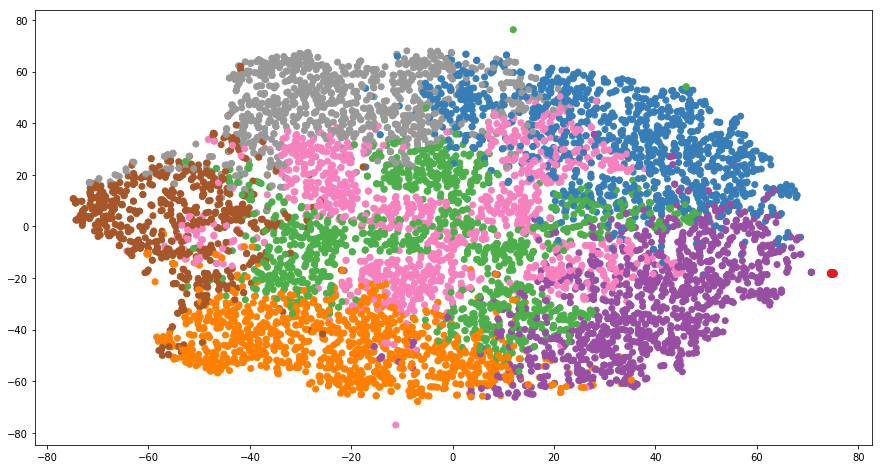

In [10]:
(fig, subplots) = plt.subplots(1, 1, figsize=(15, 8))
ax = subplots
ax.scatter(X_embedded[:, 0], X_embedded[:, 1],c=colors[kmeans.labels_])

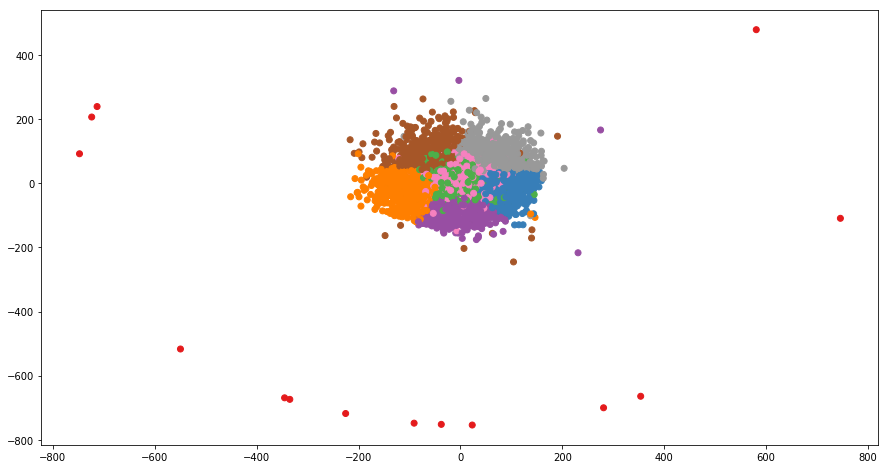

In [11]:
from sklearn import manifold
mds = manifold.MDS(2, max_iter=100, n_init=4, n_jobs=2)
Y = mds.fit_transform(X)
(fig, subplots) = plt.subplots(1, 1, figsize=(15, 8))
ax = subplots
ax.scatter(Y[:, 0], Y[:, 1],c=colors[kmeans.labels_])

In [6]:
X['label'] = kmeans.labels_
X['tot'] = df.loc[df.GAME_ID<21600001].dropna()['tot']

label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tot, dtype: object

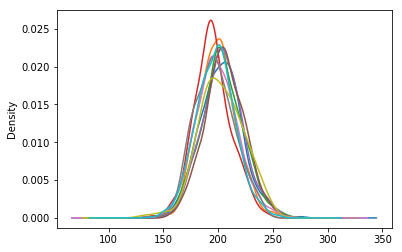